In [6]:

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline


In [7]:

# Load the dataset
data = pd.read_csv('diabetes.csv')


In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Distribution Per Column

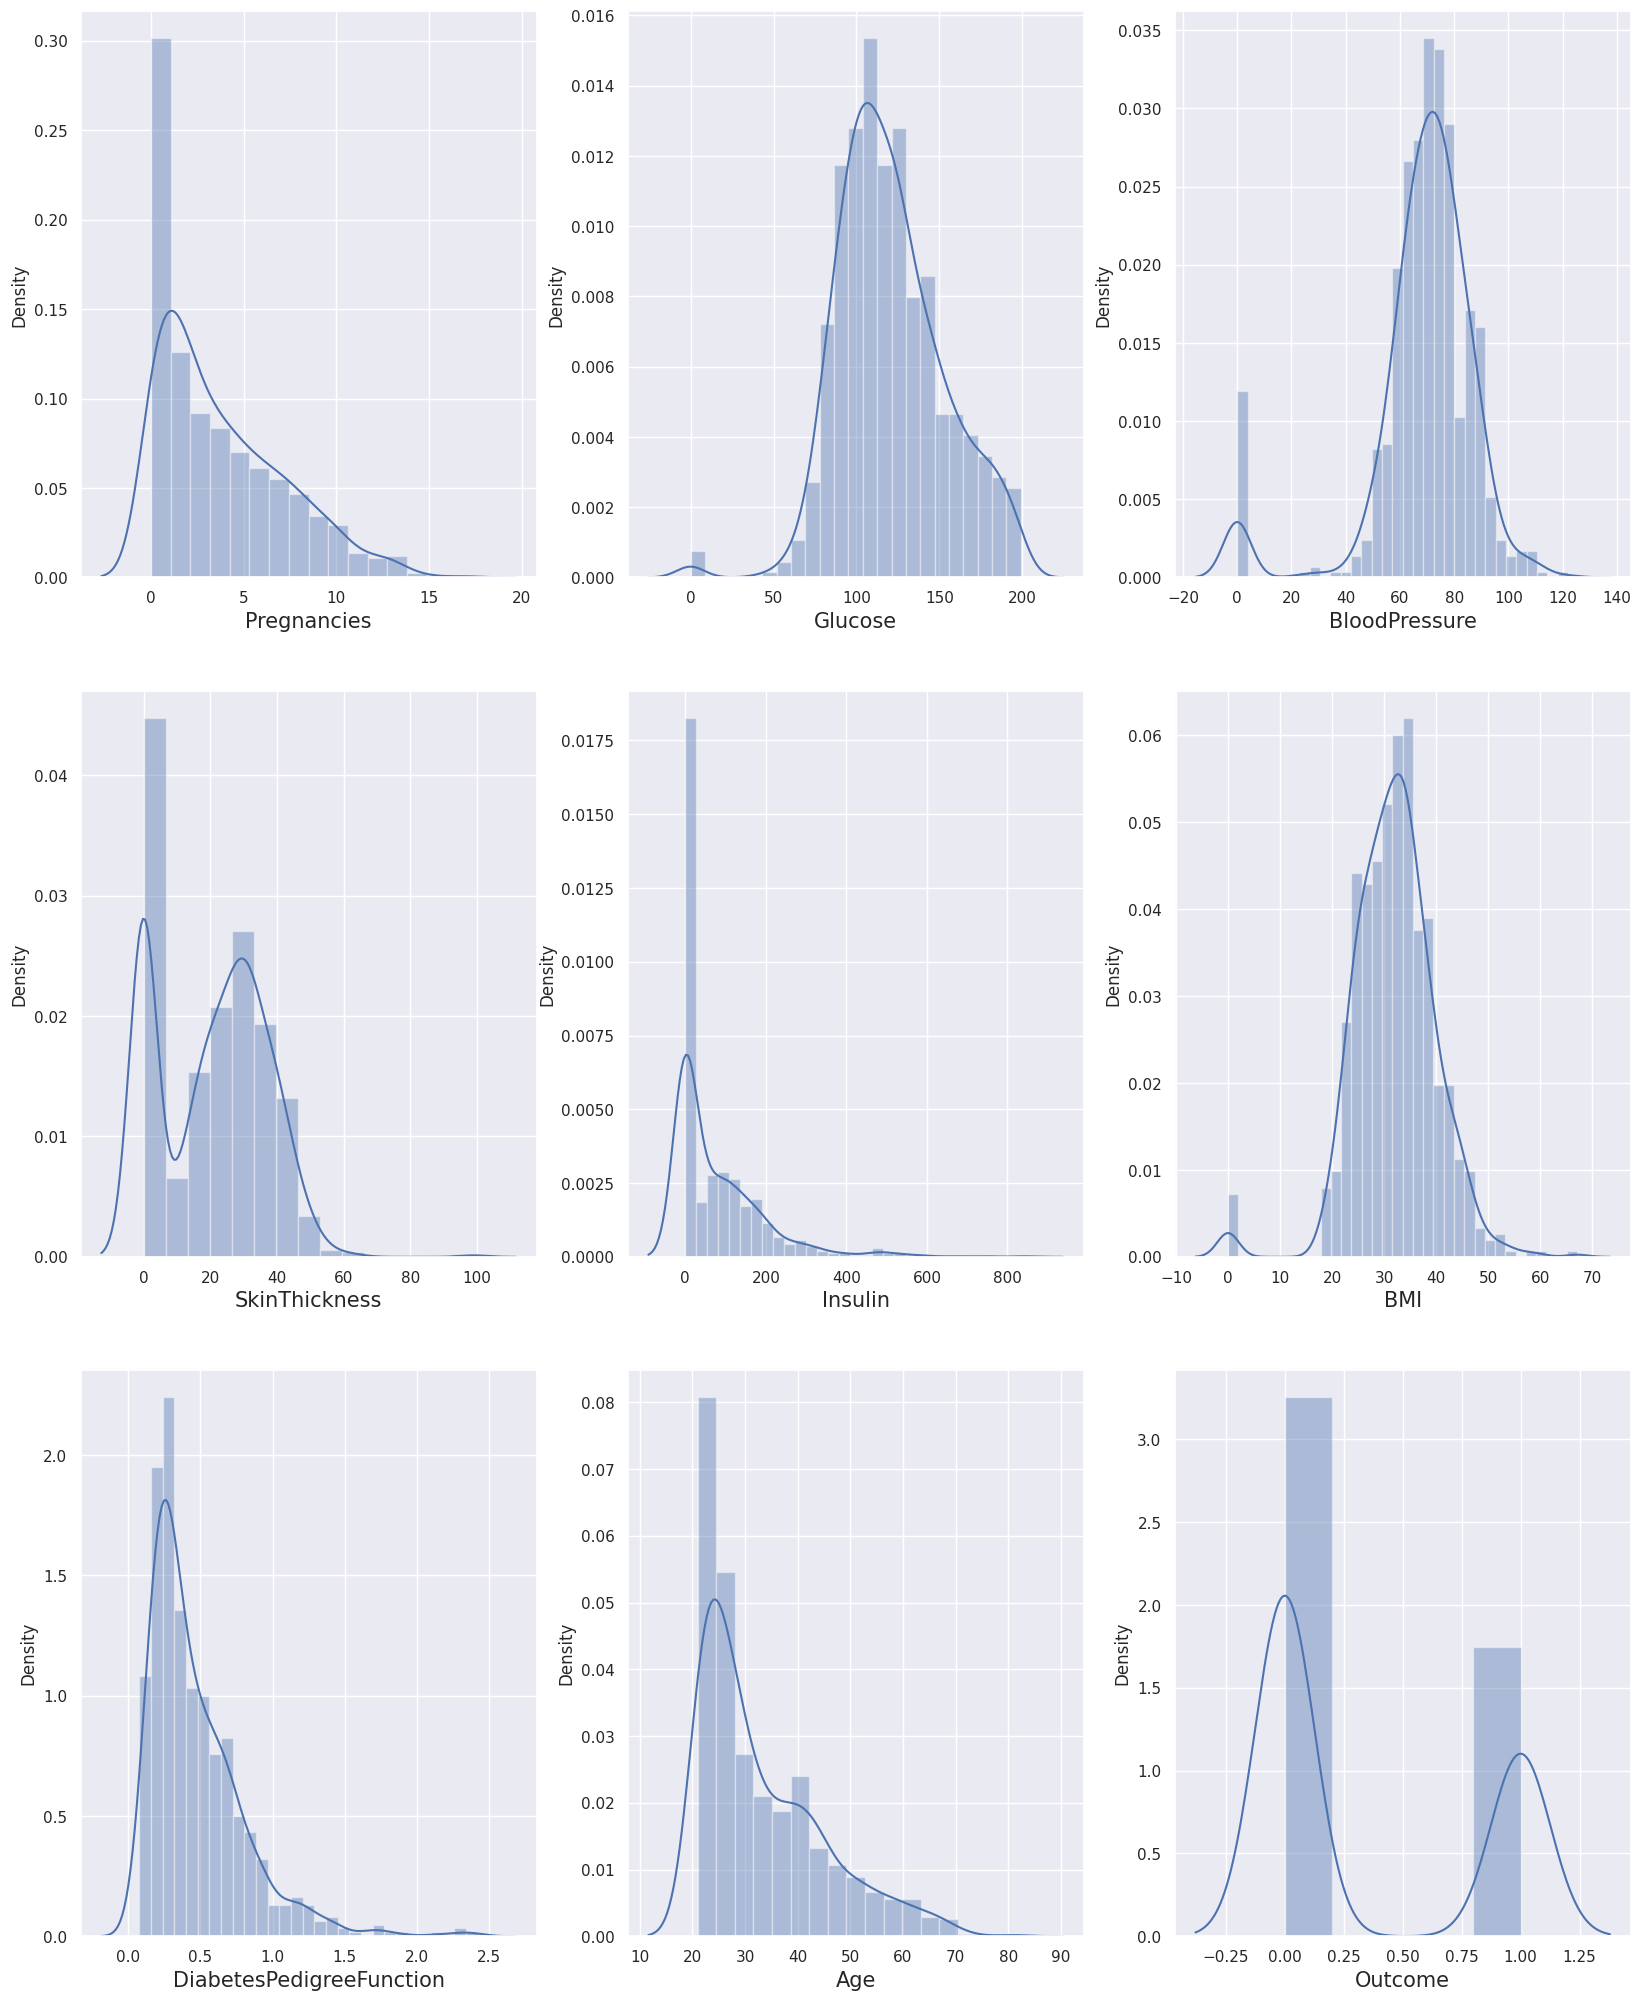

In [10]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1
plt.show()

Replacing Zero Values with Mean

In [11]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

Removing Outlier Data

removing the top 2% data from the pregnancies column removing the top 1% data from BMI column removing the top 1% data from SkinThickness column removing the top 5% data from Insulin column removing the top 1% data from DiabetesPedigreeFunction column removing the top 1% data from Age column

In [12]:
outlier = data['Pregnancies'].quantile(0.98)
data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
data = data[data['Age']<outlier]

New Data Distributin

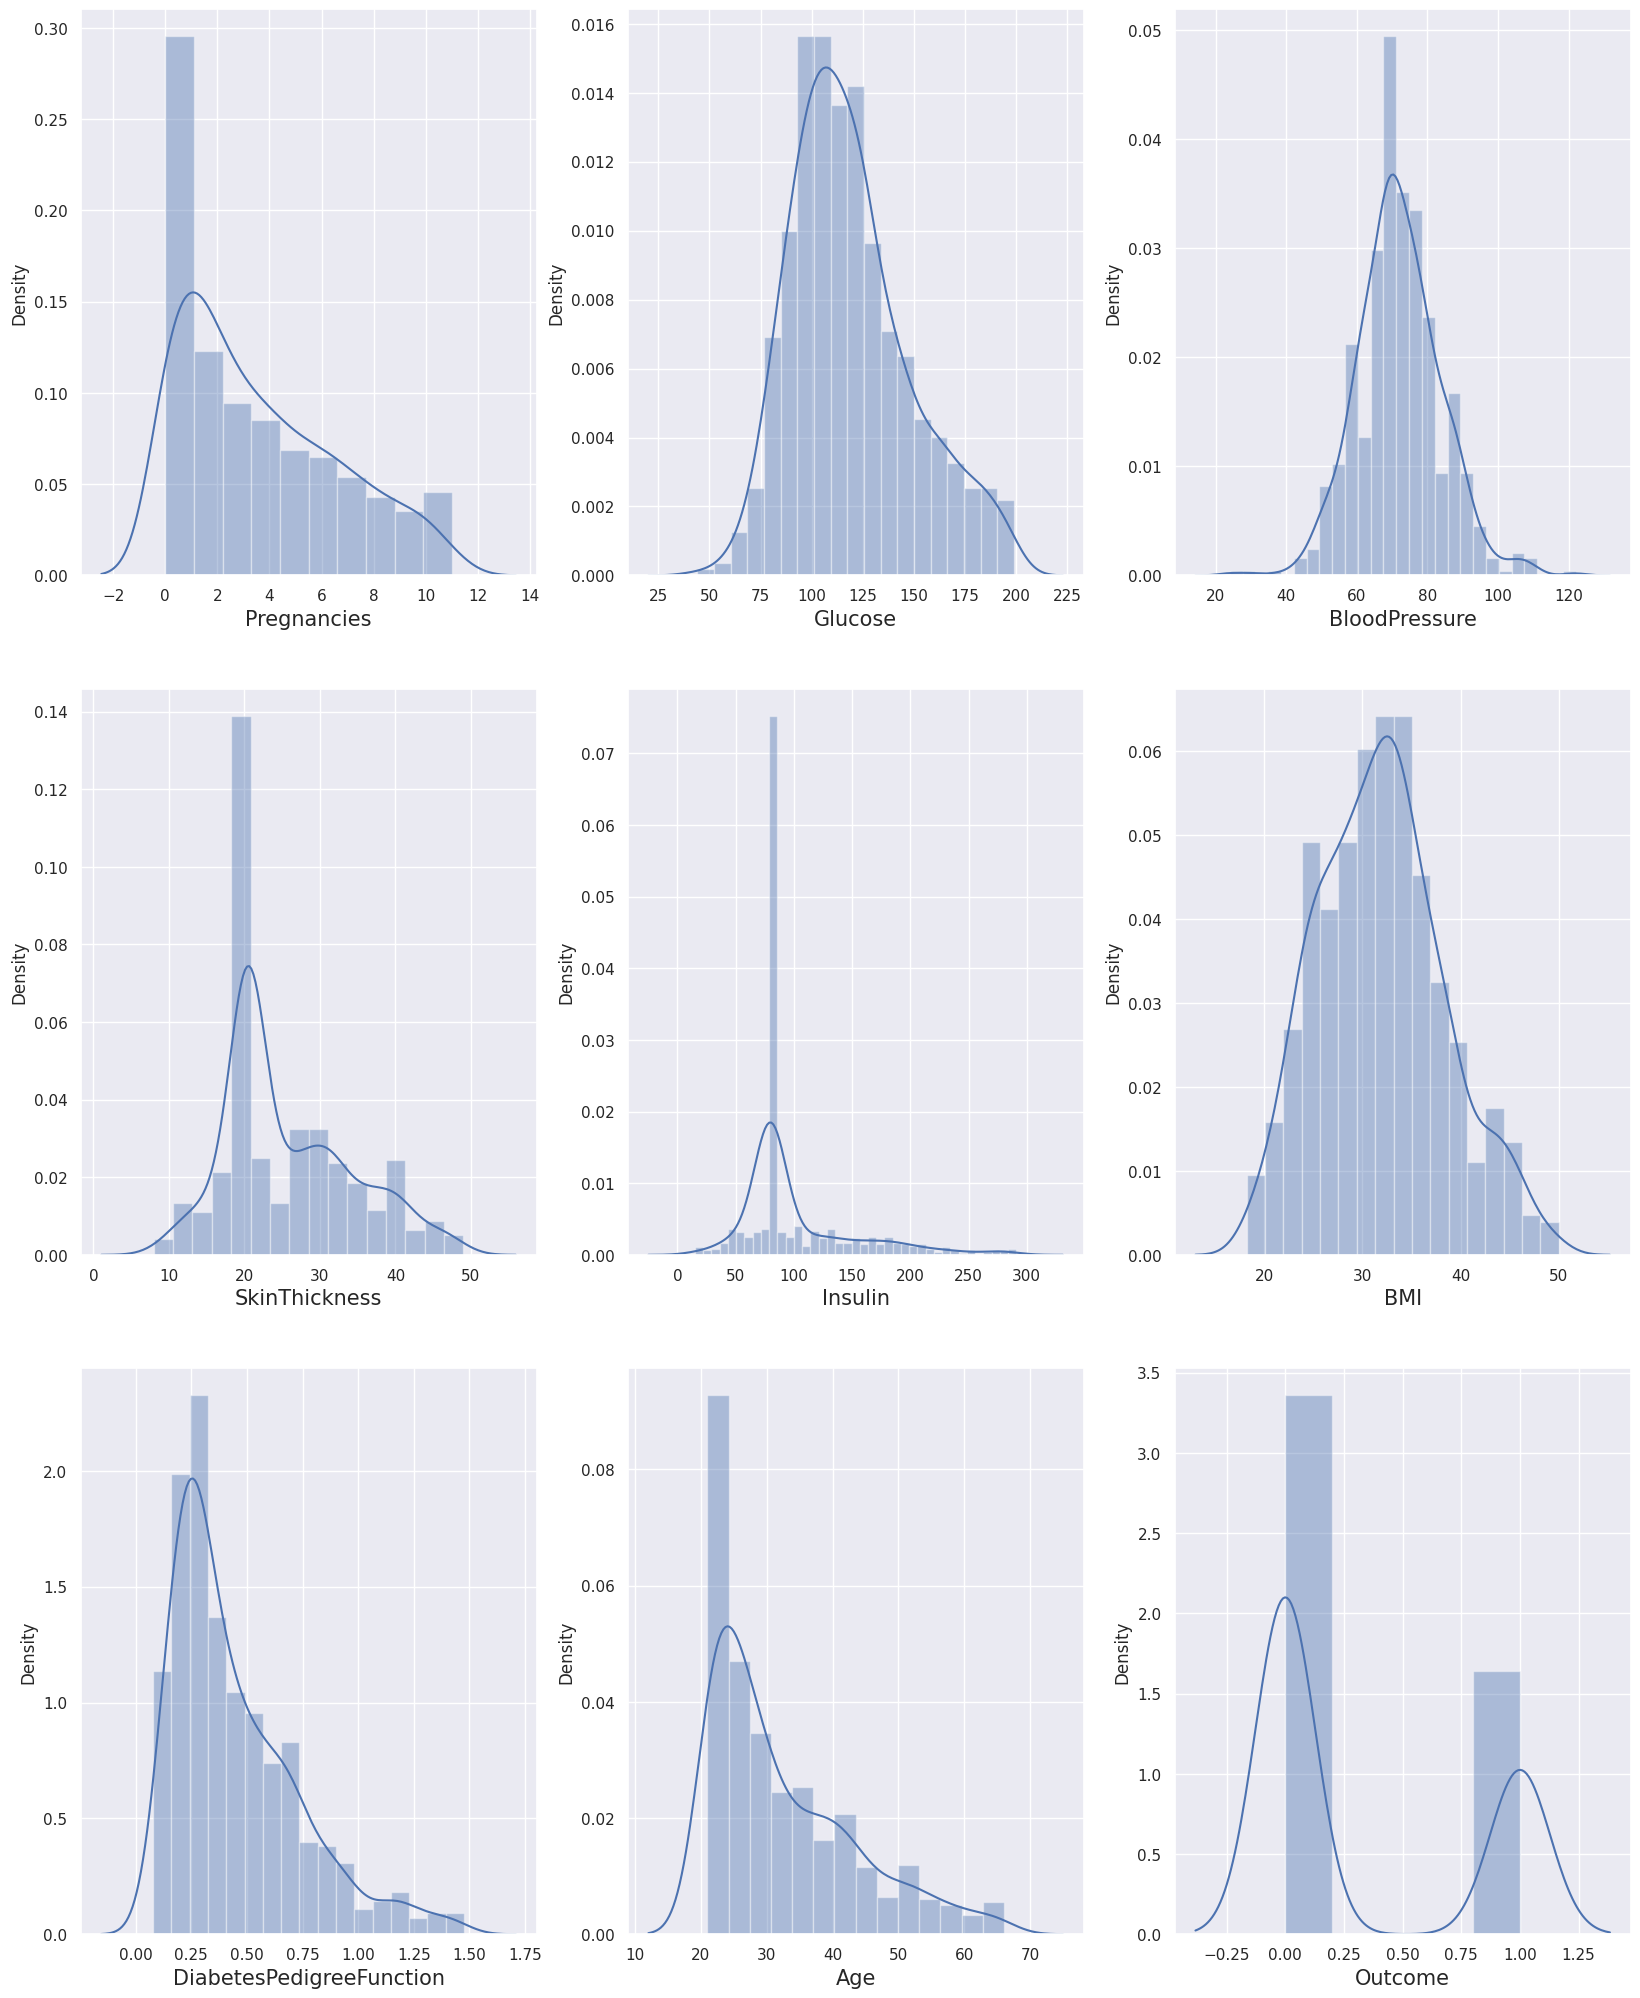

In [13]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1
plt.show()

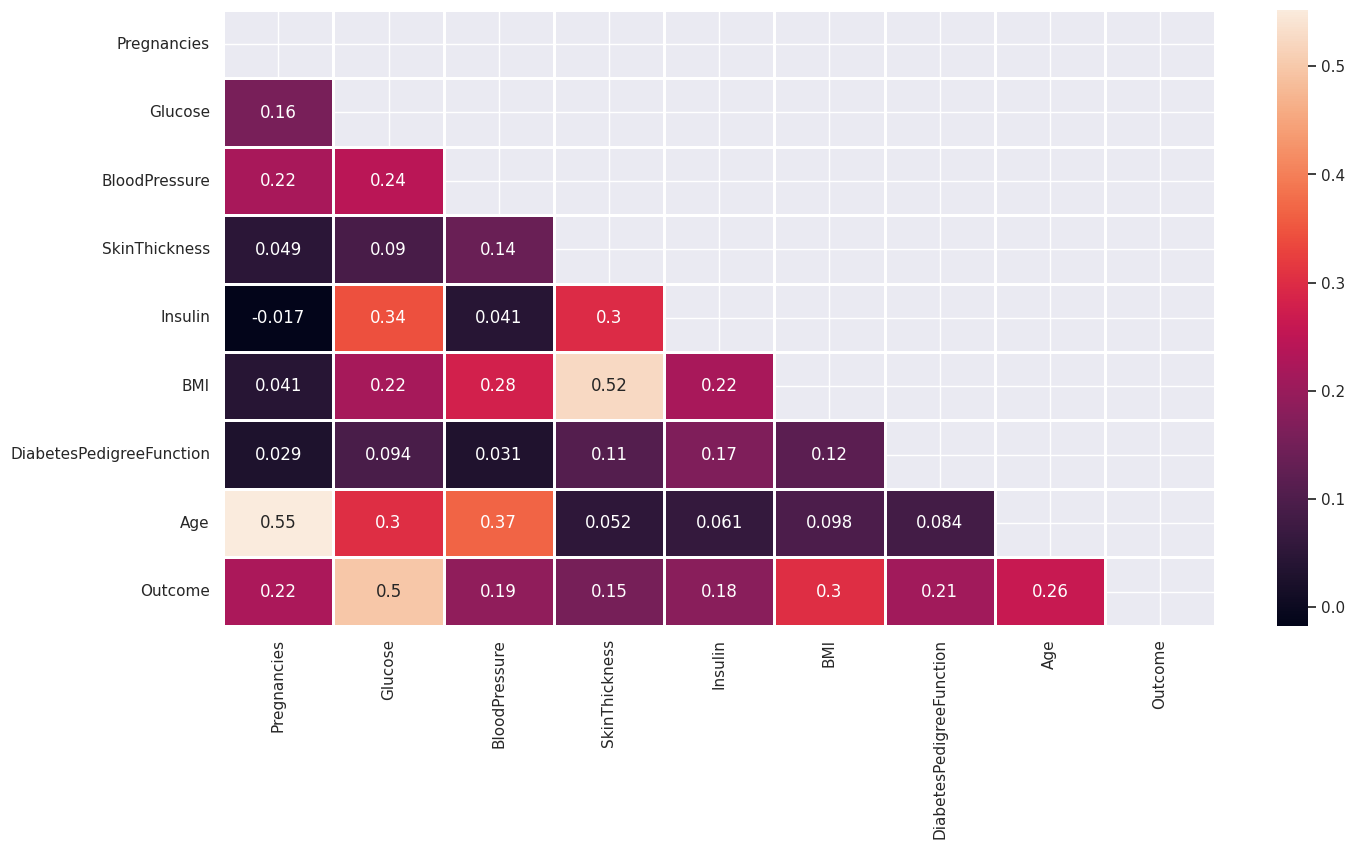

In [14]:
plt.figure(figsize = (16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [15]:
# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

# Feature scaling (Standardization)
def standardize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled


X_train_scaled, X_test_scaled = standardize(X_train, X_test)

Gradiant Boosting

In [18]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [20]:
print(f"Data type of y_train: {y_train.dtype}")
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Data type of y_test: {y_test.dtype}")
print(f"Unique values in y_test: {np.unique(y_test)}")


Data type of y_train: int64
Unique values in y_train: [0 1]
Data type of y_test: int64
Unique values in y_test: [0 1]


In [22]:
# Implementing Gradient Boosting
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Start with an initial guess, typically the mean of the target variable
        y_pred = np.full(y.shape, np.mean(y))

        for _ in range(self.n_estimators):
            # Compute the residuals (negative gradient)
            residuals = y - y_pred

            # Train a weak learner (a simple decision stump) on the residuals
            stump = DecisionStump()
            stump.fit(X, residuals)

            # Update the prediction
            y_pred += self.learning_rate * stump.predict(X)

            # Save the trained weak learner
            self.models.append(stump)

    def predict(self, X):
        # Start with the initial prediction (mean of the target)
        y_pred = np.full(X.shape[0], 0.0)

        # Aggregate predictions from all weak learners
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        # Convert predictions to binary (classification)
        return np.where(y_pred >= 0.5, 1, 0)

# Implementing a simple Decision Stump (a weak learner)
class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.polarity = 1

    def fit(self, X, y):
        n_samples, n_features = X.shape
        min_error = float('inf')

        # Try each feature as the decision stump
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                # Predict with polarity 1
                y_pred = np.ones(n_samples)
                y_pred[X[:, feature_index] < threshold] = -1

                # Calculate misclassification error
                error = np.sum((y_pred != y) * np.abs(y))

                # If error is smaller, save this stump as the best one
                if error < min_error:
                    min_error = error
                    self.polarity = 1
                    self.feature_index = feature_index
                    self.threshold = threshold

                # Predict with polarity -1 (reverse prediction)
                y_pred = np.ones(n_samples)
                y_pred[X[:, feature_index] >= threshold] = -1

                # Calculate misclassification error
                error = np.sum((y_pred != y) * np.abs(y))

                # If error is smaller, save this stump as the best one
                if error < min_error:
                    min_error = error
                    self.polarity = -1
                    self.feature_index = feature_index
                    self.threshold = threshold

    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.ones(n_samples)
        if self.polarity == 1:
            y_pred[X[:, self.feature_index] < self.threshold] = -1
        else:
            y_pred[X[:, self.feature_index] >= self.threshold] = -1
        return y_pred

# Instantiate and train Gradient Boosting model
gb = GradientBoosting(n_estimators=100, learning_rate=0.1)
gb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test_scaled)

# Evaluation
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Save model in a dictionary
models = {'gradient_boosting': gb}
print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.3f}")



Gradient Boosting Model Accuracy: 0.740


Random Forest

In [ ]:
# Helper class for Decision Tree
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1:
            return y[0]
        if self.max_depth is not None and depth >= self.max_depth:
            return Counter(y).most_common(1)[0][0]

        best_split = self._find_best_split(X, y)
        if not best_split:
            return Counter(y).most_common(1)[0][0]

        left_indices = X[:, best_split['feature']] < best_split['value']
        right_indices = X[:, best_split['feature']] >= best_split['value']
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return {'split': best_split, 'left': left_tree, 'right': right_tree}

    def _find_best_split(self, X, y):
        best_split = None
        best_score = float('inf')
        for feature in range(X.shape[1]):
            values = np.unique(X[:, feature])
            for value in values:
                left_indices = X[:, feature] < value
                right_indices = X[:, feature] >= value
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                left_y, right_y = y[left_indices], y[right_indices]
                score = len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)
                if score < best_score:
                    best_score = score
                    best_split = {'feature': feature, 'value': value}
        return best_split

    def predict(self, X):
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x):
        node = self.tree
        while isinstance(node, dict):
            if x[node['split']['feature']] < node['split']['value']:
                node = node['left']
            else:
                node = node['right']
        return node

# Helper class for Random Forest
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_vote = [Counter(preds).most_common(1)[0][0] for preds in zip(*predictions)]
        return np.array(majority_vote)

# Example usage
if __name__ == "__main__":
    # Convert data to numpy arrays if they are not already
    X_train_scaled = np.array(X_train_scaled)
    X_test_scaled = np.array(X_test_scaled)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Instantiate and train Random Forest
    rf = RandomForest(n_estimators=100, max_depth=None)
    rf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_rf = rf.predict(X_test_scaled)

    # Evaluation
    accuracy_rf = np.mean(y_pred_rf == y_test)

    # Add to models dictionary (assuming models dictionary exists)
    models = {}
    models['random_forest'] = rf
    print(f"Random Forest Model Accuracy: {accuracy_rf:.3f}")


Random Forest Model Accuracy: 0.721


SVM

In [25]:
# Support Vector Machine (SVM) implementation
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Map the labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# Instantiate and train SVM model
svm = SVM()
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Convert predictions to binary
y_pred_svm = np.where(y_pred_svm <= 0, 0, 1)

# Evaluation
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Save model in a dictionary
models = {'svm': svm}



In [26]:
print(f"SVM Accuracy: {accuracy_svm:.3f}")

SVM Accuracy: 0.760


Saving Models in a single pkl file

In [27]:

# Save all models to a single .pkl file
with open('diabetes_model.pkl', 'wb') as file:
    joblib.dump({'models': models, 'scaler': scaler}, file)

print("All models and scaler saved successfully in a single file.")


All models and scaler saved successfully in a single file.
